### 1.Practise of Scikit learn

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
# load data set

df = sns.load_dataset("tips")
df.to_csv("tips.csv")

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='total_bill', ylabel='tip'>

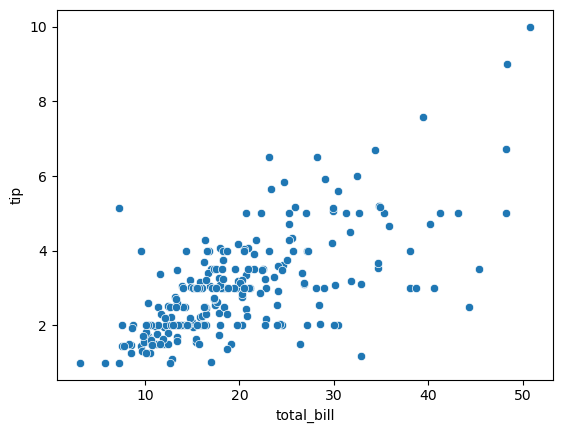

In [38]:
# Scatter plot 
sns.scatterplot(data=df , x = "total_bill" , y = "tip")


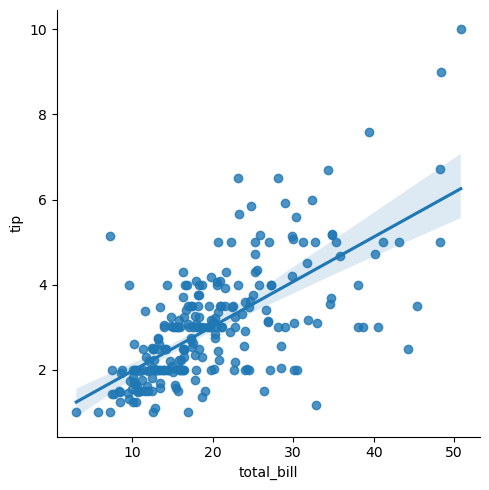

In [39]:
sns.lmplot(data=df ,x="total_bill" , y="tip")

In [40]:
# if x and y data type is categorical than convert into numeric 

# Select feature column from df 
x= df[["total_bill"]]

In [41]:
# select target column from df 

y = df["tip"]

In [42]:
df.total_bill.dtype  # Check data types of features

dtype('float64')

In [43]:
df.tip.dtype  # Check data types of features

dtype('float64')

In [44]:
# call or load linear regression model

model = LinearRegression()

# fit the model means train the model

model.fit(x , y)

LinearRegression()

In [45]:
model.score(x ,y)

0.45661658635167657

In [46]:
# lets predict the tip for unkown total_bill
data = pd.DataFrame([[23.7]] , columns=["total_bill"])
model.predict(data) 

array([3.40935068])

In [47]:
DF =  sns.load_dataset("titanic")
DF.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='fare'>

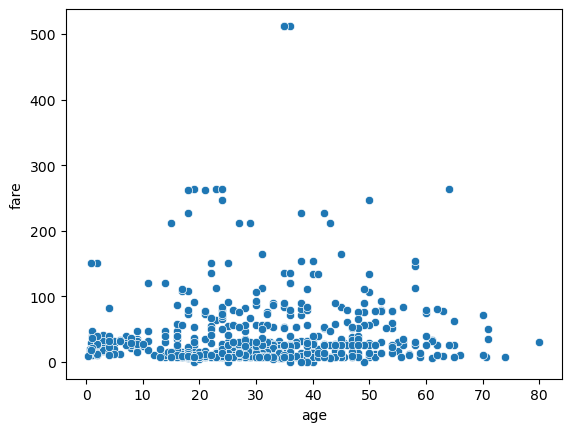

In [48]:
sns.scatterplot(data=DF , x ="age" , y="fare")

In [49]:
x=DF[["age"]]

In [50]:
y=["embarked"]

In [51]:
DF.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [52]:
DF_new = DF.copy()
DF_new["age"] = DF["age"].fillna(DF["age"].mean())

In [53]:
DF_new["embarked"] = DF["embarked"].fillna(DF["embarked"].mode()[0])

In [54]:
DF_new.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [55]:
DF_new.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [56]:
# convert categorical data into numeric
# encode embarked column

DF_new["embarked_num"] = DF_new["embarked"].map({"S" : 1 , "C" : 2 , "Q" : 3})

In [57]:
x=DF_new[["age" , "embarked_num" ]]

In [58]:
y = DF_new["fare"]

In [59]:
model = LinearRegression()

In [60]:
model.fit(x , y)


LinearRegression()

In [61]:
model.score(x,y)

0.012161691532801111

In [62]:
data = pd.DataFrame([[30 , 3]], columns=[["age" , "embarked_num" ]])
model.predict(data)

d:\Env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40.18206961])

## Logistic Regression

In [63]:
# convert survived numeric data into categorical 

DF_new["survived_c"] = DF_new["survived"].map({0:"YES" , 1:"NO"})

In [64]:
from sklearn.linear_model import LogisticRegression

x = DF_new[["age" , "embarked_num"]]
y = DF_new["survived_c"]

In [65]:
# Split data for testing and training

x_train , x_test , y_train , y_train = train_test_split(x , y , test_size=0.2 , random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(x_train , y_train)
model.score(x_train , y_train)
d = pd.DataFrame([[27,3]],  columns=[["age" , "embarked_num"]])
model.predict(d)